# <center><b>ANALYSIS OF KMART<b></center>

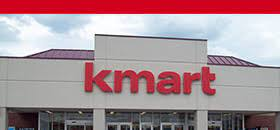

---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
4. [**Data Acquisition**](#Section4)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Data Pre-Processing**](#Section6)<br>
7. [**Data Post-Profiling**](#Section7)<br>
8. [**Exploratory Data Analysis**](#Section8)<br>
9. [**Summarization**](#Section9)</br>
  9.1 [**Conclusion**](#Section91)</br>
  9.2 [**Actionable Insights**](#Section91)</br>


# 1.**Introduction:**

 - Kmart is a leading online retailer in the US is an American big box department store chain headquartered in Hoffman Estates, Illinois, United States. 
   
   
 - As part of their annual sales review, they need to decide on their ales strategy for the year 2020 based on the insights from the sales data in 2019.
   
      
 - We are given month wise sales data for 2019 and the **task is to generate key insights which will help the sales team of Kmart to take some key business decisions towards finetuning their sales strategy.**

# **2. Problem Statement**


1. Monthly Ordering Trend
2. Revenues in the months
3. Highest  selling product
4. Average Ordered Quantity 
5. Most Single-unit Sold Product
6. Average revenue per order
7. Revenue generated by each Geographical Location


# **3. Installing & Importing Libraries**


In [1]:
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # To perform data profiling
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', 5000)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # For numerical python operations
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # for graphical operations

# 4. Data Acquisition

In [2]:
#loading the files

df1= pd.read_csv(filepath_or_buffer= 'https://raw.githubusercontent.com/jsc1535/K-Mart-Data-Analysis/main/Sales_January_2019.csv')
df2= pd.read_csv(filepath_or_buffer= 'https://raw.githubusercontent.com/jsc1535/K-Mart-Data-Analysis/main/Sales_February_2019.csv')
df3= pd.read_csv(filepath_or_buffer= 'https://raw.githubusercontent.com/jsc1535/K-Mart-Data-Analysis/main/Sales_March_2019.csv')
df4= pd.read_csv(filepath_or_buffer= 'https://raw.githubusercontent.com/jsc1535/K-Mart-Data-Analysis/main/Sales_April_2019.csv')
df5= pd.read_csv(filepath_or_buffer= 'https://raw.githubusercontent.com/jsc1535/K-Mart-Data-Analysis/main/Sales_May_2019.csv')
df6= pd.read_csv(filepath_or_buffer= 'https://raw.githubusercontent.com/jsc1535/K-Mart-Data-Analysis/main/Sales_June_2019.csv')
df7= pd.read_csv(filepath_or_buffer= 'https://raw.githubusercontent.com/jsc1535/K-Mart-Data-Analysis/main/Sales_July_2019.csv')
df8= pd.read_csv(filepath_or_buffer= 'https://raw.githubusercontent.com/jsc1535/K-Mart-Data-Analysis/main/Sales_August_2019.csv')
df9= pd.read_csv(filepath_or_buffer= 'https://raw.githubusercontent.com/jsc1535/K-Mart-Data-Analysis/main/Sales_September_2019.csv')
df10= pd.read_csv(filepath_or_buffer='https://raw.githubusercontent.com/jsc1535/K-Mart-Data-Analysis/main/Sales_October_2019.csv')
df11= pd.read_csv(filepath_or_buffer='https://raw.githubusercontent.com/jsc1535/K-Mart-Data-Analysis/main/Sales_November_2019.csv')
df12= pd.read_csv(filepath_or_buffer='https://raw.githubusercontent.com/jsc1535/K-Mart-Data-Analysis/main/Sales_December_2019.csv')

In [3]:
#checking for the shape of all the datasets before cumulating
df=list([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12])

for i in df:
    print(i.shape)

(9723, 6)
(12036, 6)
(15226, 6)
(18383, 6)
(16635, 6)
(13622, 6)
(14371, 6)
(12011, 6)
(11686, 6)
(20379, 6)
(17661, 6)
(25117, 6)


In [4]:
# Since the shape of the data is same for all the dataframes, hence appending to one dataframe= 'data'

data=pd.concat(df,ignore_index=True)
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


# 5. Data Pre-Profiling

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


**OBSERVATIONS:**
    
1. Out of 186850 entries, 186305 are non-null, indicating **Missing Values**
2. **Quantity Orderered, Order Date** and **Price Each** are object

In [6]:
data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


**OBSERVATIONS:**
    
* **Order ID, Order Date** and **Purchase Address** features have unexpected values as **top** values. These should be replaced

# 6. Data Pre-Processing

In [7]:
# Checking for the values of each features

data['Order ID'].value_counts()

Order ID    355
160873        5
226625        4
263918        4
295681        4
           ... 
256425        1
311577        1
237690        1
262854        1
187571        1
Name: Order ID, Length: 178438, dtype: int64

In [8]:
# Checking for the rows containing inconsistent order ID values
data[data['Order ID']=='Order ID']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3115,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3247,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3612,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3623,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4901,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


**OBSERVATIONS:**
    
1. The rows that contains **duplicate values 'Order ID'**, do not contain any useful data for any feature. Hence, **dropping** these duplicate rows




In [9]:
#dropping the duplicate rows

data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185688 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185687 non-null  object
 1   Product           185687 non-null  object
 2   Quantity Ordered  185687 non-null  object
 3   Price Each        185687 non-null  object
 4   Order Date        185687 non-null  object
 5   Purchase Address  185687 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


**OBSERVATIONS:**
    
    
* Out of **185688 entries**, results show **index value upto 186849**
* Out of **185688 entries**, 185687 non-null, indicating **missing values**

In [10]:
# Checking for missing values again
data.isna().sum()

Order ID            1
Product             1
Quantity Ordered    1
Price Each          1
Order Date          1
Purchase Address    1
dtype: int64

In [11]:
# Dropping rows containing missing values
data.dropna(inplace=True)


#verifying all missing values removed from Dataset
print('Missing data:\n',data.shape[0]-data.count())

Missing data:
 Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64


In [12]:
total_order = data['Order ID'].nunique()
total_order

178438

**Observations**: There have been **178437 unique orders** made on the retail site.

# 7. Data Post-Profiling

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185687 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185687 non-null  object
 1   Product           185687 non-null  object
 2   Quantity Ordered  185687 non-null  object
 3   Price Each        185687 non-null  object
 4   Order Date        185687 non-null  object
 5   Purchase Address  185687 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


**OBSERVATIONS:**
    
    
* All the features are still reflecting as **objects**. Need to check the features individually

# Data Post-processing

In [14]:
data['Quantity Ordered'].value_counts()

1                   168291
2                    13321
3                     2920
4                      806
5                      236
6                       80
7                       24
8                        5
9                        3
Quantity Ordered         1
Name: Quantity Ordered, dtype: int64

In [15]:
data[data['Quantity Ordered']=='Quantity Ordered']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


**OBSERVATIONS:**
    
    
* On checking **Quantity Ordered** feature, found it contains 1 invalid entry. As the entire row consists of inconsistent value, dropping the row

In [16]:
data.drop([1073], inplace=True)

data['Quantity Ordered'].value_counts()  

1    168291
2     13321
3      2920
4       806
5       236
6        80
7        24
8         5
9         3
Name: Quantity Ordered, dtype: int64

In [17]:
#Post-Profiling the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185686 non-null  object
 1   Product           185686 non-null  object
 2   Quantity Ordered  185686 non-null  object
 3   Price Each        185686 non-null  object
 4   Order Date        185686 non-null  object
 5   Purchase Address  185686 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


**OBSERVATIONS:**
    
1. Although the dataset is processed for missing values and inconsistent values, the datatypes of features are not converted to desired datatypes.
2. Converting the datatypes of the features.

In [18]:
data['Order ID'] = data['Order ID'].astype('int64')
data['Quantity Ordered'] = data['Quantity Ordered'].astype('int')
data['Price Each'] = data['Price Each'].astype('float64')
data['Order ID'] = data['Order ID'].astype('int64')
data['Order Date']= data['Order Date'].astype('datetime64[ns]')
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  int64         
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int32         
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(2)
memory usage: 9.2+ MB


In [19]:
data.describe()

,Order ID,Quantity Ordered,Price Each
count,185686.000000,185686.000000,185686.000000
mean,230411.376227,1.124544,184.519255
std,51511.717183,0.443069,332.843838
min,141234.000000,1.000000,2.990000
25%,185833.250000,1.000000,11.950000
50%,230354.500000,1.000000,14.950000
75%,275028.750000,1.000000,150.000000
max,319670.000000,9.000000,1700.000000


In [20]:
data['Order Date'].value_counts()

2019-12-15 20:16:00    8
2019-12-11 13:24:00    7
2019-10-30 21:28:00    7
2019-04-02 13:24:00    7
2019-10-07 13:37:00    6
                      ..
2019-08-14 22:59:00    1
2019-10-27 00:14:00    1
2019-12-13 15:44:00    1
2019-05-02 20:48:00    1
2019-02-16 00:17:00    1
Name: Order Date, Length: 142395, dtype: int64

**observations:**
    
- We will extract **Month**, **Hour** and **day of the week** of the transactions. Not considering **year**, as we have data for the single year 2019
- We will create a new feature **Revenue**


In [21]:
# Extracting Month, Day and Hour for every transaction.
data['Month'] = data['Order Date'].dt.month
data['Hour'] = data['Order Date'].dt.hour


# We get Monday = 0 to Sunday = 6 when we convert to day of the week.
# We will add +1 to every day of week so we can get Monday = 1 to Sunday = 7 
data['Day'] = (data['Order Date'].dt.dayofweek) + 1



#Adding Revenue column to dataset
data["Revenue"] = data["Quantity Ordered"] * data["Price Each"]

In [22]:
data.tail(15)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Day,Revenue
186835,319656,Apple Airpods Headphones,1,150.00,2019-12-26 23:17:00,"700 5th St, Dallas, TX 75001",12,23,4,150.00
186836,319657,LG Dryer,1,600.00,2019-12-05 13:22:00,"159 Lake St, Portland, OR 97035",12,13,4,600.00
186837,319658,AAA Batteries (4-pack),2,2.99,2019-12-24 20:46:00,"574 Dogwood St, San Francisco, CA 94016",12,20,2,5.98
186838,319659,Lightning Charging Cable,1,14.95,2019-12-13 07:25:00,"764 1st St, San Francisco, CA 94016",12,7,5,14.95
186839,319660,Apple Airpods Headphones,1,150.00,2019-12-16 17:41:00,"247 5th St, Los Angeles, CA 90001",12,17,1,150.00
186840,319661,AAA Batteries (4-pack),1,2.99,2019-12-11 21:24:00,"691 West St, Portland, ME 04101",12,21,3,2.99
186841,319662,Bose SoundSport Headphones,1,99.99,2019-12-31 19:07:00,"939 8th St, San Francisco, CA 94016",12,19,2,99.99
186842,319663,Flatscreen TV,1,300.00,2019-12-07 08:25:00,"334 12th St, Atlanta, GA 30301",12,8,6,300.00
186843,319664,ThinkPad Laptop,1,999.99,2019-12-30 01:06:00,"767 2nd St, San Francisco, CA 94016",12,1,1,999.99
186844,319665,iPhone,1,700.00,2019-12-15 11:13:00,"377 1st St, Atlanta, GA 30301",12,11,7,700.00


# 8. Exploratory Data Analysis

# 1. Monthly Ordering Trend


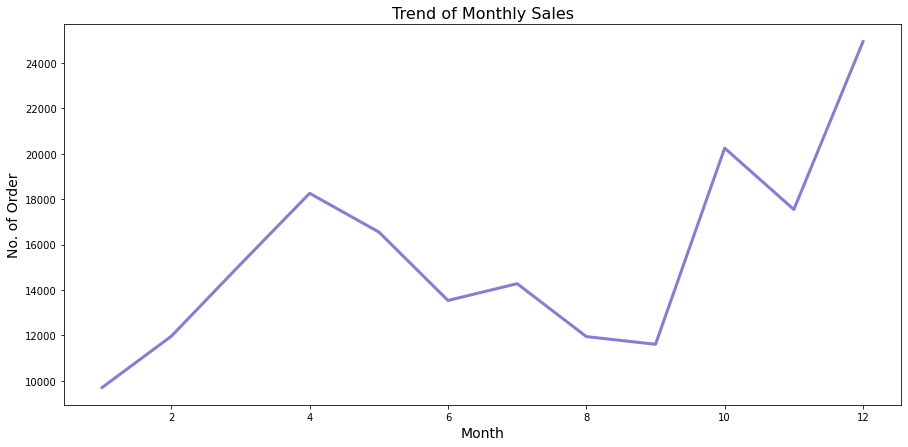

In [23]:
 # Create a figure size of 15 X 7 inches.
figure = plt.figure(figsize=[15, 7])

# Extract labels and values using .value_counts() function.
xaxis=data['Month'].value_counts().index.sort_values()

month_data = data.groupby(by=['Month']).count()
yaxis=month_data['Order ID'].unique()

  # Using .plot() function to pass the xaxis and yaxis data
plt.plot(xaxis, yaxis, color="Slateblue", alpha=0.8, linewidth=3)

  # Set x, y labels of size 14 and title label of size 16.
plt.xlabel(xlabel='Month', size=14)
plt.ylabel(ylabel='No. of Order', size=14)
plt.title(label='Trend of Monthly Sales', size=16)

  # Display the output
plt.show()

**OBSERVATIONS:**

* Sales is **highest** in **December** followed by **October**, **April** and **November**


# 2. Revenues in the months


In [24]:
revenue_df=data.groupby(by=['Month'])['Revenue'].sum().sort_values(ascending=False)
revenue_df=revenue_df.to_frame()

revenue_df

,Revenue
Month,
12,4.608296e+06
10,3.734778e+06
4,3.389218e+06
11,3.197875e+06
5,3.150616e+06
3,2.804973e+06
7,2.646461e+06
6,2.576280e+06
8,2.241083e+06


In [25]:
# Adding another column 'Month' to the Revenue dataframe
month=['Dec', 'Oct','Apr','Nov','May','Mar','Jul','Jun','Aug','Feb','Sep','Jan'] 
revenue_df['Month']=month


revenue_df

,Revenue,Month
Month,,
12,4.608296e+06,Dec
10,3.734778e+06,Oct
4,3.389218e+06,Apr
11,3.197875e+06,Nov
5,3.150616e+06,May
3,2.804973e+06,Mar
7,2.646461e+06,Jul
6,2.576280e+06,Jun
8,2.241083e+06,Aug


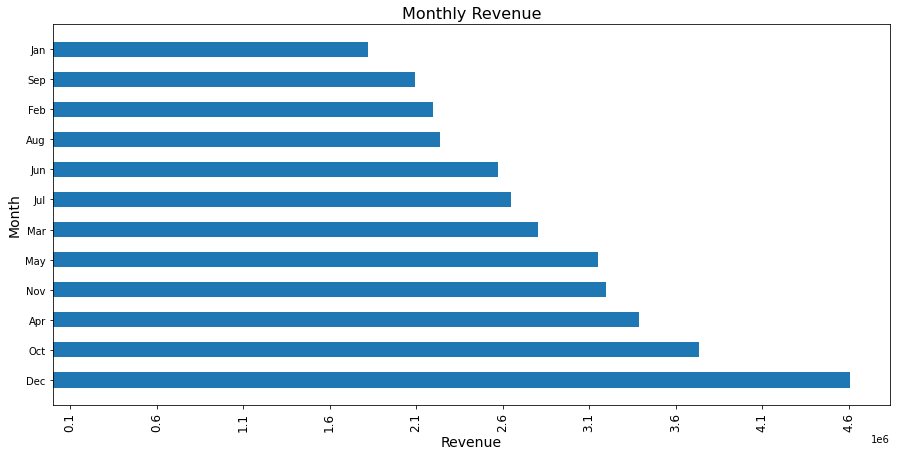

In [26]:
# Creating the canvas for the graph
plt.subplots(figsize=[15,7])

#preparing the data
yaxis=revenue_df['Month']
rev=revenue_df['Revenue'].sort_values(ascending=False)
           
plt.barh(y=yaxis, width=rev, height=0.5)
           
           
plt.xticks(ticks= np.arange(100000, 5000000, 500000), rotation=90, size=12)

plt.xlabel(xlabel= 'Revenue', size=14)
plt.ylabel(ylabel='Month', size=14)
plt.title(label='Monthly Revenue', size=16)

# Display the output
plt.show()

**OBSERVATIONS:**

* As the **December** witnessed the **highest sales**, hence the **revenue** was also **highest in December** followed by **October** and **April**

* Highest 3 months revenues(in dollars) are:

 - [ ] Dec= 4,608,296
 - [ ] Oct= 3,734,778 
 - [ ] Apr= 3,389,218 
 - [ ] Nov= 3,197,875

*  Cyber Monday, Christmas and New Year shopping is resulting in highest sales in December

*  Halloween, Thanksgiving, New Apple product purchasing season resulting in October sales

* Good Friday, Easter Sunday and Easter Monday holiday sales in April

* Holiday and Discount season for Consumer electronics and Gadgets as well as delivery of  Electronics which were pre-ordered during Techtober(October)

# 3. Highest  selling product


In [27]:
print('List of products sold:\n', data['Product'].value_counts().index)


print('Total no. of items sold: ',data['Product'].nunique())

List of products sold:
 Index(['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones',
       'Apple Airpods Headphones', 'Bose SoundSport Headphones',
       '27in FHD Monitor', 'iPhone', '27in 4K Gaming Monitor',
       '34in Ultrawide Monitor', 'Google Phone', 'Flatscreen TV',
       'Macbook Pro Laptop', 'ThinkPad Laptop', '20in Monitor',
       'Vareebadd Phone', 'LG Washing Machine', 'LG Dryer'],
      dtype='object')
Total no. of items sold:  19


In [28]:
prodsold=data.groupby(by=['Product'])['Quantity Ordered'].sum().sort_values(ascending=False)
prodsold= prodsold.to_frame()
prodsold

,Quantity Ordered
Product,
AAA Batteries (4-pack),30986
AA Batteries (4-pack),27615
USB-C Charging Cable,23931
Lightning Charging Cable,23169
Wired Headphones,20524
Apple Airpods Headphones,15637
Bose SoundSport Headphones,13430
27in FHD Monitor,7541
iPhone,6847


In [29]:
#Adding 'Item' column to the dataframe for further analysis
item=['AAA Batteries (4-pack)', 'AA Batteries (4-pack)','USB-C Charging Cable','Lightning Charging Cable','Wired Headphones','Apple Airpods Headphones','Bose SoundSport Headphones','27in FHD Monitor','iPhone','27in 4K Gaming Monitor','34in Ultrawide Monitor','Google Phone', 'Flatscreen TV', 'Macbook Pro Laptop', 'ThinkPad Laptop', '20in Monitor', 'Vareebadd Phone', 'LG Washing Machine', 'LG Dryer'] 
prodsold['Item']=item

prodsold

,Quantity Ordered,Item
Product,,
AAA Batteries (4-pack),30986,AAA Batteries (4-pack)
AA Batteries (4-pack),27615,AA Batteries (4-pack)
USB-C Charging Cable,23931,USB-C Charging Cable
Lightning Charging Cable,23169,Lightning Charging Cable
Wired Headphones,20524,Wired Headphones
Apple Airpods Headphones,15637,Apple Airpods Headphones
Bose SoundSport Headphones,13430,Bose SoundSport Headphones
27in FHD Monitor,7541,27in FHD Monitor
iPhone,6847,iPhone


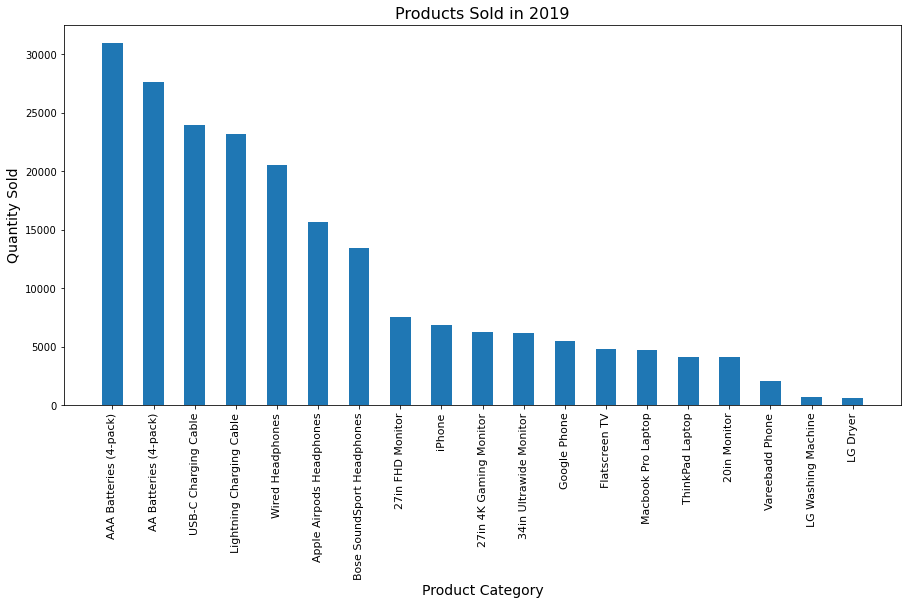

In [32]:
#Plotting the graph
plt.figure(figsize=[15,7])

#Preparing the data to plot the graph
product= prodsold['Item']
qty_sold= prodsold['Quantity Ordered']

plt.bar(product, qty_sold, width=0.5)


# Set x, y labels of size 14 and title label of size 16.
plt.xticks(size=11, rotation=90)

plt.xlabel(xlabel= 'Product Category', size=14)
plt.ylabel(ylabel='Quantity Sold', size=14)
plt.title(label='Products Sold in 2019', size=16)

# Display the output
plt.show()

**Observations**

* Top 5 Most sold items are **AAA Batteries (4-pack), AA Batteries (4-pack), USB-C Charging Cable** and **Lightning Charging Cable**

* **AAA Batteries (4-pack)** as compared to **AA Batteries (4pack)** are most sold item because of the following reasons:

 - [ ] More home automation system
 - [ ] Increased trend of miniaturization of modern day technology
 - [ ] Energy efficient design that requires less energy consumption
 - [ ]  Advanced and efficient PCB design and architecture, portability 

* Standardization of port designs to USB-C and efficiency of this design, leading to Modern Appliances, Smartphones and gadgets using this design, resulting in the sales of the USB-C Charging Cable.

* Apple ecosystem resulting in sales of **Lightning Charging Cable**

# 4. Average Ordered Quantity 


In [40]:
data["Quantity Ordered"].value_counts()

1    168291
2     13321
3      2920
4       806
5       236
6        80
7        24
8         5
9         3
Name: Quantity Ordered, dtype: int64

In [41]:
data['Quantity Ordered'].describe()

count    185686.000000
mean          1.124544
std           0.443069
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           9.000000
Name: Quantity Ordered, dtype: float64

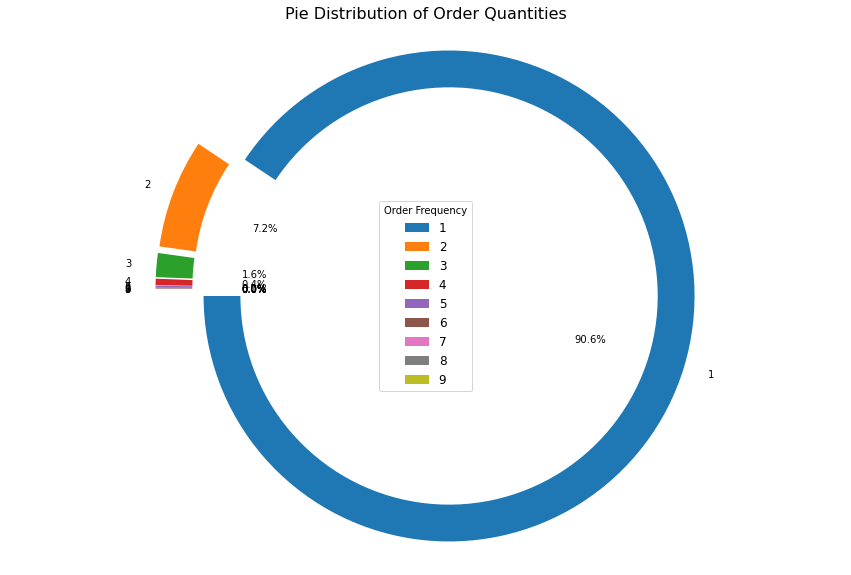

In [36]:
# Creating the canvas for the graph
plt.figure(figsize=[15,10])

#Preparing the data to plot the graph
extract= data['Quantity Ordered'].value_counts().sort_index()
labels = extract.index
sizes  = extract.values

# Initiate an explode list of categories
explode_list = np.ones(len(data['Quantity Ordered'].unique()))/10

# Using .pie() function to pass the xaxis and yaxis data
plt.pie(x=sizes, labels=labels, explode=explode_list, autopct='%1.1f%%', 
            startangle=180, shadow=False, wedgeprops=dict(width=0.15))
    
plt.axis('equal')

plt.legend(labels, title="Order Frequency", loc="center", prop={'size': 12})

# Set title label of size 16.
plt.title(label='Pie Distribution of Order Quantities', size=16)

# Display the output
plt.show()

**OBSERVATIONS**:
    
* **90.6%** Orders placed for **1 quantity** and **7.2%** orders are placed for **2 quantity**
* **Average no. of items ordered** is **1.12unit**

# 5. Most Single-unit Sold Product

In [37]:
#Filtering out the data for Quantity ordered= 1
df=data[data['Quantity Ordered']==1]

#Creating a new dataframe with filtered data of single unit orders
df_new=df[['Product', 'Price Each', 'Quantity Ordered']]
df_new

,Product,Price Each,Quantity Ordered
0,iPhone,700.00,1
1,Lightning Charging Cable,14.95,1
3,27in FHD Monitor,149.99,1
4,Wired Headphones,11.99,1
5,AAA Batteries (4-pack),2.99,1
...,...,...,...
186844,iPhone,700.00,1
186845,Lightning Charging Cable,14.95,1
186847,Vareebadd Phone,400.00,1
186848,Wired Headphones,11.99,1


In [41]:
#Finding out the most frequently bought item for unit.

mostSinglOrderItem=df_new.groupby(by=['Product', 'Price Each'])['Quantity Ordered'].sum().sort_values(ascending=False)
mostSinglOrderItem=mostSinglOrderItem.to_frame()
mostSinglOrderItem

,,Quantity Ordered
Product,Price Each,
Lightning Charging Cable,14.95,20162
USB-C Charging Cable,11.95,19975
Wired Headphones,11.99,17328
Apple Airpods Headphones,150.00,15414
AA Batteries (4-pack),3.84,15315
AAA Batteries (4-pack),2.99,13699
Bose SoundSport Headphones,99.99,13168
27in FHD Monitor,149.99,7455
iPhone,700.00,6833


In [43]:
mostSinglOrderItem['Product']= ['Lightning Charging Cable','USB-C Charging Cable','Wired Headphones','Apple Airpods Headphones','AA Batteries (4-pack)','AAA Batteries (4-pack)','Bose SoundSport Headphones','27in FHD Monitor','iPhone','27in 4K Gaming Monitor','34in Ultrawide Monitor','Google Phone','Flatscreen TV','Macbook Pro Laptop','ThinkPad Laptop','20in Monitor','Vareebadd Phone','LG Washing Machine','LG Dryer']
mostSinglOrderItem

,,Quantity Ordered,Product
Product,Price Each,,
Lightning Charging Cable,14.95,20162,Lightning Charging Cable
USB-C Charging Cable,11.95,19975,USB-C Charging Cable
Wired Headphones,11.99,17328,Wired Headphones
Apple Airpods Headphones,150.00,15414,Apple Airpods Headphones
AA Batteries (4-pack),3.84,15315,AA Batteries (4-pack)
AAA Batteries (4-pack),2.99,13699,AAA Batteries (4-pack)
Bose SoundSport Headphones,99.99,13168,Bose SoundSport Headphones
27in FHD Monitor,149.99,7455,27in FHD Monitor
iPhone,700.00,6833,iPhone


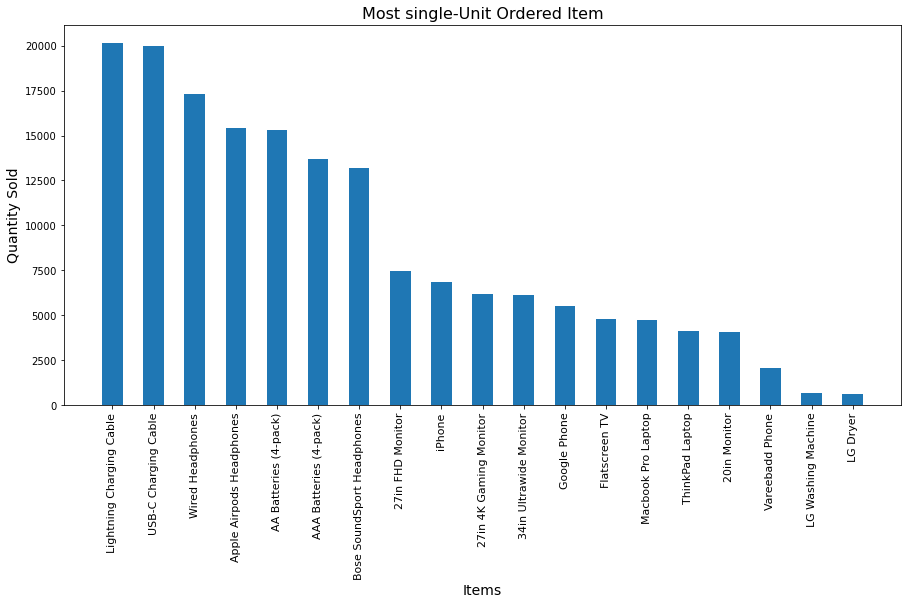

In [44]:
#Plotting the graph
plt.figure(figsize=[15,7])

#Preparing the data to plot the graph
product= mostSinglOrderItem['Product']
qty_sold=mostSinglOrderItem['Quantity Ordered']

plt.bar(product, qty_sold, width=0.5)


# Set x, y labels of size 14 and title label of size 16.
plt.xticks(size=11, rotation=90)

plt.xlabel(xlabel= 'Item', size=14)
plt.ylabel(ylabel='Quantity Sold', size=14)
plt.title(label='Most single-Unit Ordered Item', size=16)

# Display the output
plt.show()

**Observations:**
    
* We have already found that **90.6% orders** were placed for **single(1) unit** of an item
* **Lightning charging Cable** is the **most single unit sold item** selling **20162 units**
* **USB-C Charging Cable** and **Wired Headphones** are second and third most selling items, selling **19975 units** and **17328 units**

# 6. Average revenue per order

In [56]:
avg_revenue_per_order = data.groupby(['Order ID'])['Revenue'].mean().reset_index()
avg_revenue_per_order.head()

,Order ID,Revenue
0,141234,700.00
1,141235,14.95
2,141236,23.98
3,141237,149.99
4,141238,11.99


In [57]:
avg_revenue_per_order.describe()

,Order ID,Revenue
count,178437.000000,178437.000000
mean,230452.000000,182.689890
std,51510.469329,328.498298
min,141234.000000,2.990000
25%,185843.000000,11.950000
50%,230452.000000,14.950000
75%,275061.000000,150.000000
max,319670.000000,3400.000000


**Observations:**

 - **Average revenue** per Order is **182.69**
 -  **50% orders** placed are worth **14.95**
 -  **50% orders** are **small orders** for low-priced items

# 7. Revenue generated by each Geographical Location

In [129]:
data.head(110)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Day,Revenue,City,State with Zip,State
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,21,2,700.00,Boston,MA 02215,MA
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14,1,14.95,Portland,OR 97035,OR
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,13,4,23.98,San Francisco,CA 94016,CA
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,20,6,149.99,Los Angeles,CA 90001,CA
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11,5,11.99,Austin,TX 73301,TX
5,141239,AAA Batteries (4-pack),1,2.99,2019-01-29 20:22:00,"775 Willow St, San Francisco, CA 94016",1,20,2,2.99,San Francisco,CA 94016,CA
6,141240,27in 4K Gaming Monitor,1,389.99,2019-01-26 12:16:00,"979 Park St, Los Angeles, CA 90001",1,12,6,389.99,Los Angeles,CA 90001,CA
7,141241,USB-C Charging Cable,1,11.95,2019-01-05 12:04:00,"181 6th St, San Francisco, CA 94016",1,12,6,11.95,San Francisco,CA 94016,CA
8,141242,Bose SoundSport Headphones,1,99.99,2019-01-01 10:30:00,"867 Willow St, Los Angeles, CA 90001",1,10,2,99.99,Los Angeles,CA 90001,CA
9,141243,Apple Airpods Headphones,1,150.00,2019-01-22 21:20:00,"657 Johnson St, San Francisco, CA 94016",1,21,2,150.00,San Francisco,CA 94016,CA


In [47]:
# Creating a column: "City" in the dataset from the 'Purchase Address'
citylist = []
for i in data['Purchase Address']:
    citylist.append(i.split(",")[1])
data['City'] = citylist



# Creating a column: "State with Zip" code in the dataset from the 'Purchase Address'

statelist = []
for i in data['Purchase Address']:
    statelist.append(i.split(',')[2])
    
data['State with Zip']= statelist

# Creating a column: "State" without the Zip code in the dataset from the "State with Zip"

statelist1=[]
for i in data['State with Zip']:
    statelist1.append(i.split(' ')[1])
    
data['State']=statelist1

#Displaying the dataframe
data.head(10)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Day,Revenue,City,State with Zip,State
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,21,2,700.00,Boston,MA 02215,MA
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14,1,14.95,Portland,OR 97035,OR
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,13,4,23.98,San Francisco,CA 94016,CA
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,20,6,149.99,Los Angeles,CA 90001,CA
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11,5,11.99,Austin,TX 73301,TX
5,141239,AAA Batteries (4-pack),1,2.99,2019-01-29 20:22:00,"775 Willow St, San Francisco, CA 94016",1,20,2,2.99,San Francisco,CA 94016,CA
6,141240,27in 4K Gaming Monitor,1,389.99,2019-01-26 12:16:00,"979 Park St, Los Angeles, CA 90001",1,12,6,389.99,Los Angeles,CA 90001,CA
7,141241,USB-C Charging Cable,1,11.95,2019-01-05 12:04:00,"181 6th St, San Francisco, CA 94016",1,12,6,11.95,San Francisco,CA 94016,CA
8,141242,Bose SoundSport Headphones,1,99.99,2019-01-01 10:30:00,"867 Willow St, Los Angeles, CA 90001",1,10,2,99.99,Los Angeles,CA 90001,CA
9,141243,Apple Airpods Headphones,1,150.00,2019-01-22 21:20:00,"657 Johnson St, San Francisco, CA 94016",1,21,2,150.00,San Francisco,CA 94016,CA


In [51]:
#Creating a dataframe with  Revenue generated in Cities, grouped by State and Cities

geolocat_rev= data.groupby(['State','City'])['Revenue'].sum().sort_values(ascending=False)
geolocat_rev= geolocat_rev.to_frame()
geolocat_rev

Revenue
State City                        
CA     San Francisco  8.254744e+06
       Los Angeles    5.448304e+06
NY     New York City  4.661867e+06
MA     Boston         3.658628e+06
GA     Atlanta        2.794199e+06
TX     Dallas         2.765374e+06
WA     Seattle        2.745046e+06
OR     Portland       1.870011e+06
TX     Austin         1.818044e+06
ME     Portland       4.493214e+05

In [128]:
##Creating a dataframe with  Revenue generated in each State

geolocat_rev= data.groupby(['State'])['Revenue'].sum().sort_values(ascending=False)
geolocat_rev= geolocat_rev.to_frame()

# Adding State column to the geolocat_rev dataframe for further analysis

geolocat_rev['State']=['CA', 'NY', 'TX', 'MA', 'GA', 'WA', 'OR','ME']
geolocat_rev

,Revenue,State
State,,
CA,1.370305e+07,CA
NY,4.661867e+06,NY
TX,4.583418e+06,TX
MA,3.658628e+06,MA
GA,2.794199e+06,GA
WA,2.745046e+06,WA
OR,1.870011e+06,OR
ME,4.493214e+05,ME


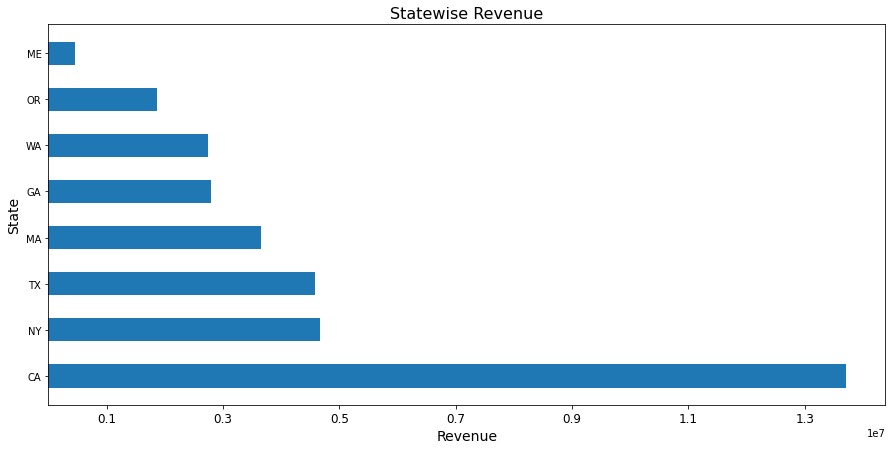

In [66]:
# Plotting graph for City Revenue

# Creating the canvas for the graph
plt.subplots(figsize=[15,7])

#preparing the data
yaxis=geolocat_rev['State']
rev=geolocat_rev['Revenue']
           
plt.barh(y=yaxis, width=rev, height=0.5)
           
           
plt.xticks(ticks= np.arange(1000000, 15000000, 2000000), size=12)

plt.xlabel(xlabel= 'Revenue', size=14)
plt.ylabel(ylabel='State', size=14)
plt.title(label='Statewise Revenue', size=16)

# Display the output
plt.show()

In [139]:
value= 60321720/4583418
print('California Revenue: $60321720')
print('New York Revenue: $4583418')

print('California State Revenue is {0:.2f} times the revenue of New York'.format(value))

California Revenue: $60321720
New York Revenue: $4583418
California State Revenue is 13.16 times the revenue of New York


**Observations:**
    
* State: **California** generates maximum revenue of **60,321,720(dollars)**, followed by **New York** and **Texas** with revenues **4,661,867(dollars)** and **4,583,418(dollars)** 

* Revenue of **California** is **13.16%** of the revenue of **New York**

* **San Francisco** city generates **maximum revenue** in **California** 

# **9. Summarization**

-  **<h4>9.1  Conclusion</h4>**
    
* Maximum Sales are generated in the Holiday Seasons
* Highest Selling Product are AAA Batteries (4-pack), AA Batteries (4-pack), USB-C Charging Cable and Lightning Charging Cable. 
* Average no. of items ordered is 1.12unit
* Highest Single-unit selling product are Lightning Charging Cable, USB-C Charging Cable and Wired Headphones
* Average revenue per Order is 182.69 dollars 
* Maximum Revenue is generated in the State of California
* Maximum revenue is generated in the city of San Francisco under the state of California. 
    
    
-  **<h4>9.2  Actionable Insights</h4>**

* Marketing and Promotional activities should be focused before the Holiday seasons

* As most sold products are batteries and chargers, discounted offers and/or bundled products can be offered to customer for more sales.

* Since 50% orders are placed for small orders, offers can be focused on low-priced items for profit maximization in volume 

* Sales of AAA batteries(4pack) and chargers indicates increased usage of home automation system and apple ecosystem. From this, we can uncover related electronic items that can lead to similar sales

* More analysis is required on the Customers buying only Lightning Charging Cable, USB-C Charging Cable, Wired Headphones  and/or Apple Airpods Headphones to uncover their buying habits

* Marketing strategies should be focused mostly in California, New York and Texas
